In [1]:
#QUESTION1

#SYNTHETIC DATA RECORDS 2024

In [ ]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [13]:
fake = Faker()

In [14]:
num_records = 10000000
size = 100

In [15]:
data = {
    'ID': np.arange(1, num_records + 1),
    'Name': [fake.name() for _ in range(num_records)],
    'Date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_records)),
    'Value': np.random.uniform(10.0, 100.0, num_records).round(2),
    'Category': np.random.choice(['Category A', 'Category B', 'Category C'], num_records)
}

In [ ]:
df = pd.DataFrame(data)

In [14]:
df

,ID,Name,Date,Value,Category
0,1,Vanessa Leonard,2024-07-16,34.85,Category C
1,2,Michael Flores,2024-11-09,10.60,Category B
2,3,Dean Carey,2024-04-30,26.08,Category B
3,4,Jennifer Wyatt,2024-05-19,31.49,Category B
4,5,Rebecca Stanley,2024-08-29,23.82,Category C
...,...,...,...,...,...
9999995,9999996,Christopher Mora,2024-02-28,90.80,Category A
9999996,9999997,Christina Hansen,2024-12-08,39.74,Category B
9999997,9999998,Jeremy Miller,2024-05-30,28.72,Category C
9999998,9999999,Heather Middleton,2024-11-17,65.87,Category B


In [9]:
df.sample(10)

,ID,Name,Date,Value,Category
8664215,8664216,Jennifer Miller,2024-07-28,76.80,Category C
1325442,1325443,Robin Browning,2024-01-16,55.47,Category C
5107519,5107520,Scott Little,2024-05-10,48.15,Category B
97724,97725,Robert Simmons,2024-04-24,47.00,Category B
5912372,5912373,Donna Lynch,2024-12-26,19.22,Category B
8348215,8348216,Timothy Rodriguez,2024-02-07,76.90,Category C
7727327,7727328,Joshua Bartlett,2024-11-18,49.03,Category A
8785333,8785334,William Branch,2024-05-01,24.68,Category A
6133183,6133184,Michelle Ellison,2024-10-25,67.64,Category C
2516128,2516129,Amanda Peterson,2024-11-27,84.08,Category C


In [17]:
#QUESTION(2i)

#IMPORTING A DATASET

In [5]:
from sklearn.datasets import load_diabetes

In [76]:
diabetes = load_diabetes()

In [78]:
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [80]:
data['target'] = diabetes.target

In [82]:
corr = data[['age', 'sex', 'bmi', 'target']].corr()

In [40]:
print(corr)

             age       sex       bmi    target
age     1.000000  0.173737  0.185085  0.187889
sex     0.173737  1.000000  0.088161  0.043062
bmi     0.185085  0.088161  1.000000  0.586450
target  0.187889  0.043062  0.586450  1.000000


In [ ]:
# Calculated column 1: BMI squared

In [58]:
data['bmi_squared'] = data['bmi'] ** 2

In [60]:
# Calculated column 2: Age multiplied by BMI

In [62]:
data['age_bmi'] = data['age'] * data['bmi']

In [64]:
# Calculated column 3: Logarithm of Systolic Blood Pressure

In [66]:
data['log_bp'] = np.log(data['bp'])

C:\Users\hilla\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
# Perform Correlation Analysis using a Heatmap

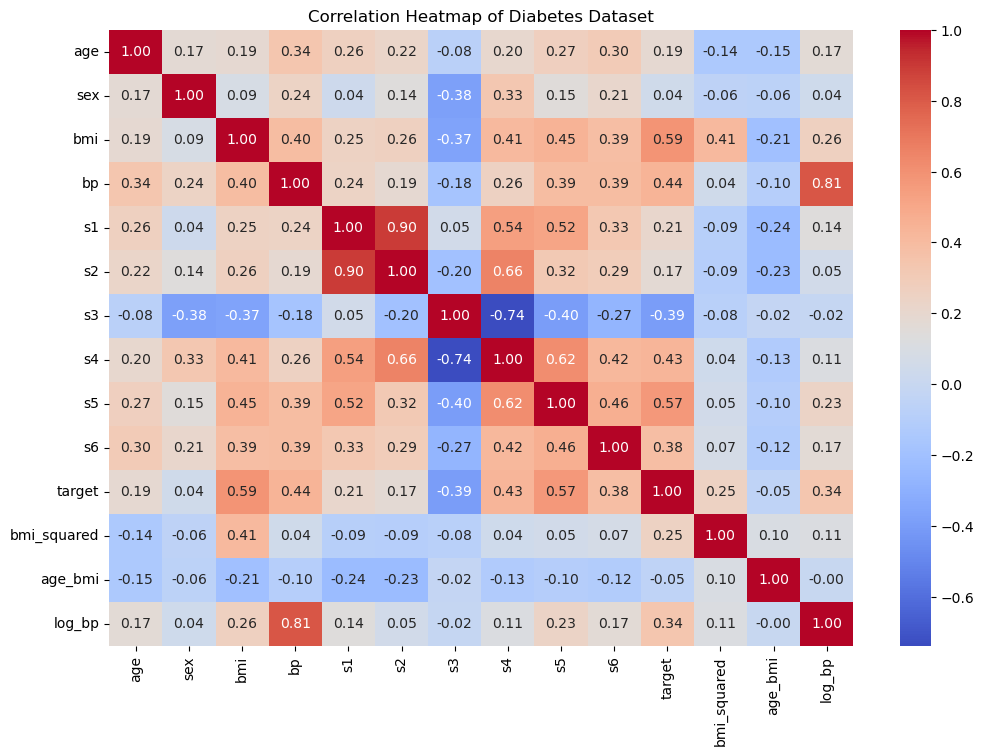

In [70]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

ORIGINAL FEATURES IN THE DATASET:
1 age: Age of the patient.
2 sex: Gender of the patient.
3 bmi: Body Mass Index (BMI) of the patient.
4 bp: Average Blood Pressure (Systolic Blood Pressure).
5 s1: TC (Total Cholesterol).
6 s2: LDL (Low-Density Lipoproteins).
7 s3: HDL (High-Density Lipoproteins).
8 s4: TCH (Total Cholesterol / HDL).
9 s5: LTG (log of Serum Triglycerides level).
10 s6: Glucose (Blood Sugar Level).

CALCULATED COLUNMS:
1 bmi_squared: The square of the BMI. It emphasizes the influence of higher BMI values and is often used in models where a non-linear relationship between BMI and the target variable is hypothesized.

2 age_bmi: The product of age and BMI. This interaction term is used to explore how the combined effect of age and BMI influences the target variable.

3 log_bp: The natural logarithm of the blood pressure (bp). Taking the logarithm can help normalize skewed data, emphasizing the proportional change rather than absolute differences.

In [88]:
#QUESTION(2iii)

In [ ]:
titanic = sns.load_dataset("titanic")

In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [102]:
# 1. Sort by Age (ascending)

In [108]:
sorted_by_age = titanic.sort_values(by='age', ascending=True)

In [110]:
sorted_by_age.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [112]:
# 2. Filter by Gender (female passengers only)

In [114]:
filtered_females = titanic[titanic['sex'] == 'female']

In [116]:
 filtered_females.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [118]:
# 3. Sort by Fare (descending)

In [128]:
sorted_by_fare = titanic.sort_values(by='fare', ascending=False)

In [130]:
sorted_by_fare.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False


In [132]:
# 4. Filter by Survival (only those who survived)

In [134]:
filtered_survived = titanic[titanic['survived'] == 1]

In [136]:
filtered_survived.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [138]:
# 5. Combined Filter and Sort: Embarked from 'S' and sorted by class (ascending)

In [140]:
filtered_embarked_s_sorted_class = titanic[titanic['embarked'] == 'S'].sort_values(by='class', ascending=True)

In [142]:
 filtered_embarked_s_sorted_class.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
248,1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
434,0,1,male,50.0,1,0,55.9000,S,First,man,True,E,Southampton,no,False
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
711,0,1,male,NaN,0,0,26.5500,S,First,man,True,C,Southampton,no,True


In [144]:
#QUESTION(2iv)  Usung index method to perform 7 different filter operations on the dataset

In [146]:
#1. Filter for Male Passengers

In [148]:
male_passengers = titanic[titanic['sex'] == 'male']

In [156]:
male_passengers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [158]:
#2. Filter for Passengers Below 18 Years of Age

In [160]:
children = titanic[titanic['age'] < 18]

In [162]:
children.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [164]:
#3. Filter for Passengers Who Paid a Fare Greater Than 50

In [166]:
high_fare_passengers = titanic[titanic['fare'] > 50]

In [168]:
high_fare_passengers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False


In [170]:
#4. Filter for First Class Passengers

In [172]:
first_class_passengers = titanic[titanic['class'] == 'First']

In [174]:
first_class_passengers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


In [176]:
#5. Filter for Passengers Who Embarked from 'C' (Cherbourg)

In [178]:
cherbourg_passengers = titanic[titanic['embarked'] == 'C']

In [180]:
cherbourg_passengers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True


In [182]:
#6. Filter for Passengers Who Survived

In [184]:
survivors = titanic[titanic['survived'] == 1]

In [186]:
survivors.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [188]:
#7. Filter for Female Passengers in Second Class

In [190]:
female_second_class = titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'Second')]

In [194]:
female_second_class.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
41,0,2,female,27.0,1,0,21.0000,S,Second,woman,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
53,1,2,female,29.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False


In [5]:
#QUESTION(2v) Creating a dashboard with at least 6 visuals

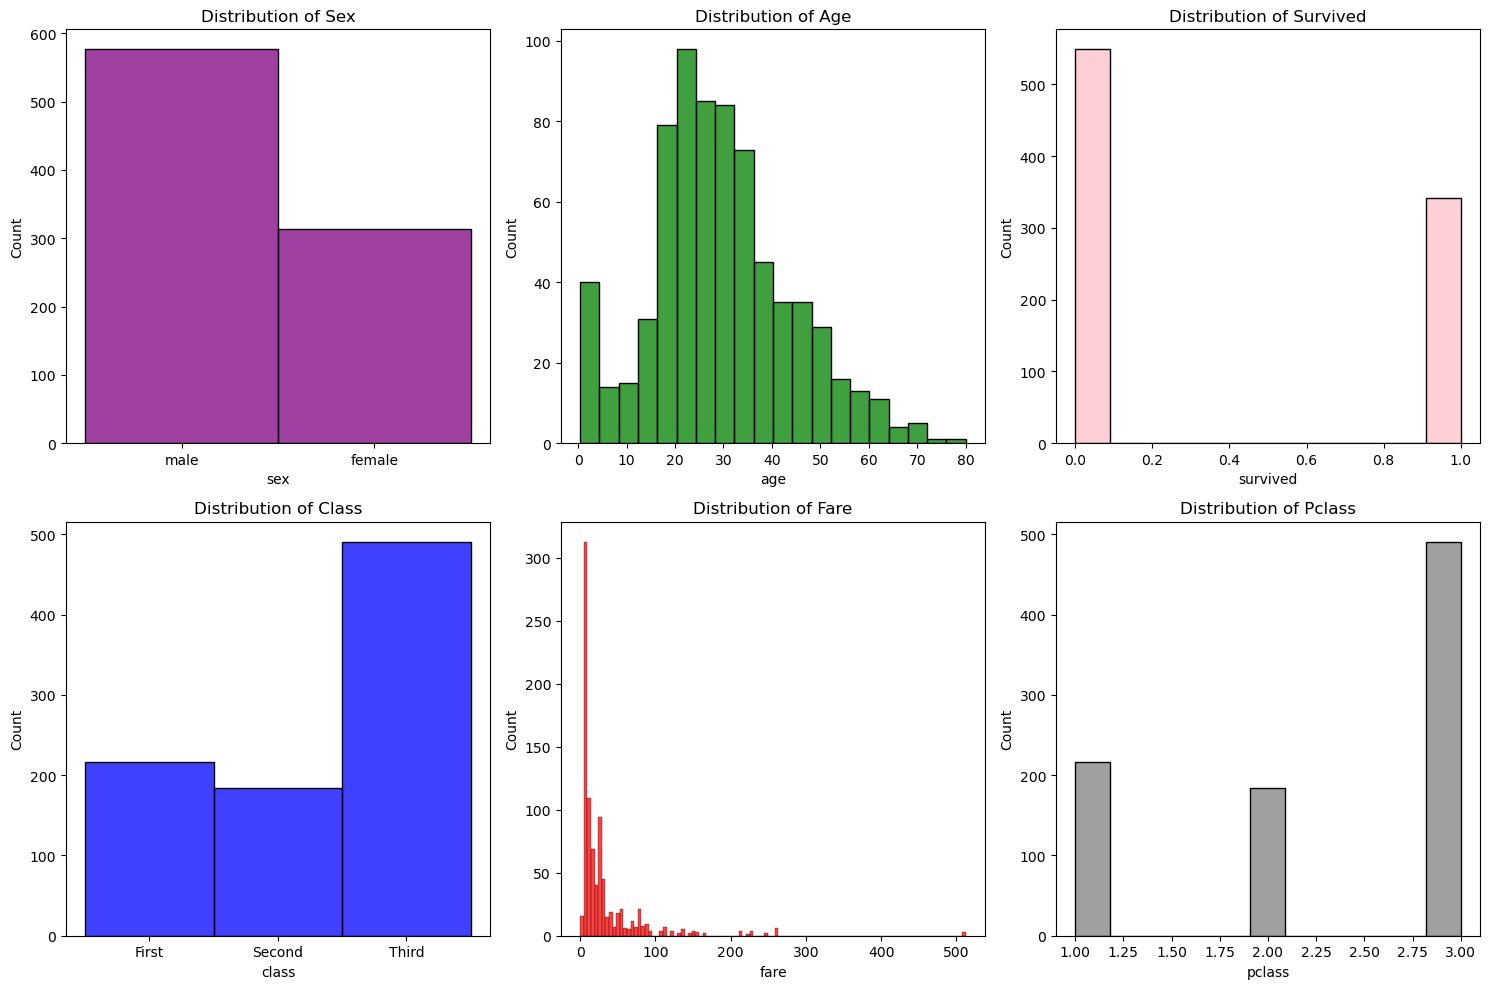

In [77]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

a = titanic['sex']
b = titanic['age']
c = titanic['class']
d = titanic['fare']
e = titanic['survived']
f = titanic['pclass']

sns.histplot(a, color='purple', ax=axis[0, 0])
axis[0, 0].set_title('Distribution of Sex')

sns.histplot(b, color='green', ax=axis[0, 1])
axis[0, 1].set_title('Distribution of Age')

sns.histplot(c, color='blue', ax=axis[1, 0])
axis[1, 0].set_title('Distribution of Class')

sns.histplot(d, color='red', ax=axis[1, 1])
axis[1, 1].set_title('Distribution of Fare')

sns.histplot(e, color='pink', ax=axis[0, 2])
axis[0, 2].set_title('Distribution of Survived')

sns.histplot(f, color='grey', ax=axis[1, 2])
axis[1, 2].set_title('Distribution of Pclass')

plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter(titanic, x='age', y='fare', color='class', 
                 title='Age vs Fare by Class Status', 
                 labels={'class': 'Class'},
                 hover_data=['class', 'sex'])
fig.show()

In [41]:
# QUESTION(2vi) Carry out Descriptive Statistics on your dataset.

Overall Descriptive Statistics
Using the describe() function from Pandas, we can get a summary of the central tendency, dispersion, and shape of the dataset's distribution,excluding NaN values.

In [45]:
overall_stats = titanic.describe()
overall_stats

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Count: Number of non-null entries.
Mean: The average value.
Std: Standard deviation, which measures the dispersion of the dataset.
Min: Minimum value.
25% (Q1): First quartile (25th percentile).
50% (Median): Second quartile (50th percentile).
75% (Q3): Third quartile (75th percentile).
Max: Maximum value.

In [131]:
titanic = sns.load_dataset("titanic")

In [133]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#QUESTION(2vii)  Create a linear, and logistic regression model to make predictions on dataset

Handle Missing Values.
Fill missing values or drop rows/columns with significant missing data.

In [69]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

C:\Users\hilla\AppData\Local\Temp\ipykernel_1052\88629372.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\hilla\AppData\Local\Temp\ipykernel_1052\88629372.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [71]:
titanic.drop(columns=['deck', 'embark_town'], inplace=True)

In [73]:
titanic.dropna(subset=['embarked'], inplace=True)

In [75]:
# ENCODING VALUES

In [97]:
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})
titanic['who'] = titanic['who'].map({'man': 1, 'woman': 2, 'child': 3})
titanic.drop(columns=['alive', 'embark_town', 'adult_male', 'alone', 'sibsp', 'parch', 'who'], inplace=True)

In [99]:
# Split the Data into Training and Testing Sets
# Separate the data into features (X) and target (y), and then split into training and test sets.

In [103]:
# For Linear Regression - Predicting Fare#
X_lr = titanic.drop(columns=['fare', 'survived'])
y_lr = titanic['fare']

In [105]:
# For Logistic Regression - Predicting Survival
X_logr = titanic.drop(columns=['survived', 'fare'])
y_logr = titanic['survived']

In [109]:
# Split for Linear Regression
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

In [157]:
# Split for Logistic Regression
X_logr_train, X_logr_test, y_logr_train, y_logr_test = train_test_split(X_logr, y_logr, test_size=0.2, random_state=42)

In [ ]:
#  Linear Regression Model

In [121]:
linear_model = LinearRegression()

In [123]:
linear_model

LinearRegression()

In [129]:
linear_model.fit(titanic[['survived']],titanic.fare)

LinearRegression()

In [141]:
linear_model.predict([[1]])

C:\Users\hilla\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([48.3954076])

In [143]:
linear_model.predict([[0]])

C:\Users\hilla\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([22.11788689])

In [145]:
#  Logistic Regression Model

In [153]:
logistic_model = LogisticRegression(max_iter=1000)

In [155]:
logistic_model

LogisticRegression(max_iter=1000)

In [165]:
logistic_model.fit(titanic[['fare']],titanic.survived)

LogisticRegression(max_iter=1000)

In [167]:
logistic_model.predict([[71.2833]])

C:\Users\hilla\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1], dtype=int64)

In [169]:
logistic_model.predict([[7.2500]])

C:\Users\hilla\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0], dtype=int64)

In [171]:
#QUESTION 3  What is logistic regression?

Logistic regression is a type of statistical model used for binary classification tasks. It's a widely used algorithm in machine learning and statistics for predicting the probability that an observation falls into one of two categories based on one or more independent variables.

In [173]:
#QUESTION 4  Mention one use case of logistic regression.

Use Case: Credit Scoring
In the finance industry, logistic regression is widely used to predict whether a borrower will default on a loan or not. Banks and financial institutions use this model to assess the risk of lending to an individual based on various factors such as:

Income level
Employment status
Credit history
Outstanding debts
Loan amount requested
Age
Marital status